<a href="https://colab.research.google.com/github/MehmetAltinkurt/Computer_Vision_Projects/blob/main/Wheat/Wheat_Yellow_Rust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download nafishamoin/new-bangladeshi-crop-disease

100% 2.35G/2.35G [02:00<00:00, 24.0MB/s]
100% 2.35G/2.35G [02:00<00:00, 20.9MB/s]


In [ ]:
! unzip new-bangladeshi-crop-disease

In [58]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



import PIL
import PIL.Image
from matplotlib.image import imread


import tensorflow as tf
import tensorflow_datasets as tfds

In [8]:
tf.__version__

'2.11.0'

In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
!nvidia-smi

Wed Mar 22 06:53:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
original_dataset_dir="/content/BangladeshiCrops/BangladeshiCrops/Crop___Disease/Wheat"

In [12]:
base_dir="/content/tempdir"
os.mkdir(base_dir)

In [13]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_healthy_dir = os.path.join(train_dir, 'healthy')
os.mkdir(train_healthy_dir)
train_yellow_rust_dir = os.path.join(train_dir, 'yellow_rust')
os.mkdir(train_yellow_rust_dir)
validation_healthy_dir = os.path.join(validation_dir, 'healthy')
os.mkdir(validation_healthy_dir)
validation_yellow_rust_dir = os.path.join(validation_dir, 'yellow_rust')
os.mkdir(validation_yellow_rust_dir)
test_healthy_dir = os.path.join(test_dir, 'healthy')
os.mkdir(test_healthy_dir)
test_yellow_rust_dir = os.path.join(test_dir, 'yellow_rust')
os.mkdir(test_yellow_rust_dir)

In [14]:
print('total Healthy images:', len(os.listdir(original_dataset_dir+"/Wheat___Healthy")))
print('total Yellow Rust images:', len(os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust")))

total training Healthy images: 1116
total training Yellow Rust images: 924


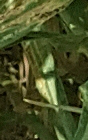

In [17]:
PIL.Image.open(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[923])

In [24]:
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[0]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[923]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[100]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[350]).shape)
print(imread(original_dataset_dir+"/Wheat___Yellow_Rust/"+os.listdir(original_dataset_dir+"/Wheat___Yellow_Rust/")[600]).shape)

(114, 342, 3)
(140, 88, 3)
(166, 146, 3)
(48, 34, 3)
(82, 382, 3)


In [25]:
healthy_wheat_list = []

for root, dirs, files in os.walk(original_dataset_dir+"/Wheat___Healthy/"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            healthy_wheat_list.append(os.path.join(root, file))

rusty_wheat_list = []

for root, dirs, files in os.walk(original_dataset_dir+"/Wheat___Yellow_Rust/"):
    for file in files:
        #all 
        if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
            rusty_wheat_list.append(os.path.join(root, file))




In [30]:
height_list=[]
width_list=[]

for im in healthy_wheat_list:
  height_list.append(imread(im).shape[0])
  width_list.append(imread(im).shape[1])

for im in rusty_wheat_list:
  height_list.append(imread(im).shape[0])
  width_list.append(imread(im).shape[1])

print(height_list)
print(width_list)

[419, 849, 761, 697, 545, 947, 751, 1373, 1524, 710, 1150, 290, 273, 958, 713, 679, 829, 758, 945, 762, 545, 1478, 459, 1296, 1046, 428, 722, 573, 2203, 946, 1040, 361, 637, 1005, 577, 1322, 601, 505, 443, 515, 222, 1036, 775, 891, 801, 504, 670, 541, 478, 1492, 585, 790, 395, 632, 417, 971, 556, 424, 407, 898, 680, 716, 656, 1044, 504, 444, 1504, 1441, 680, 2248, 714, 773, 632, 499, 990, 369, 904, 1156, 355, 244, 948, 262, 1436, 681, 1076, 262, 674, 1341, 662, 1100, 557, 962, 814, 835, 522, 391, 880, 1464, 419, 611, 829, 1515, 880, 895, 1192, 854, 1022, 1132, 891, 634, 617, 719, 393, 1339, 2006, 638, 842, 350, 243, 616, 1425, 734, 582, 614, 315, 749, 1321, 661, 965, 813, 1021, 772, 855, 729, 732, 613, 1236, 1065, 639, 1143, 1026, 1121, 538, 1362, 1188, 1393, 465, 879, 620, 1584, 986, 1256, 419, 519, 1016, 389, 1057, 443, 1478, 1663, 296, 750, 983, 1103, 711, 1232, 1225, 709, 1015, 771, 1132, 928, 532, 1408, 631, 250, 875, 1000, 1194, 766, 272, 270, 1134, 1077, 472, 413, 483, 383, 1010

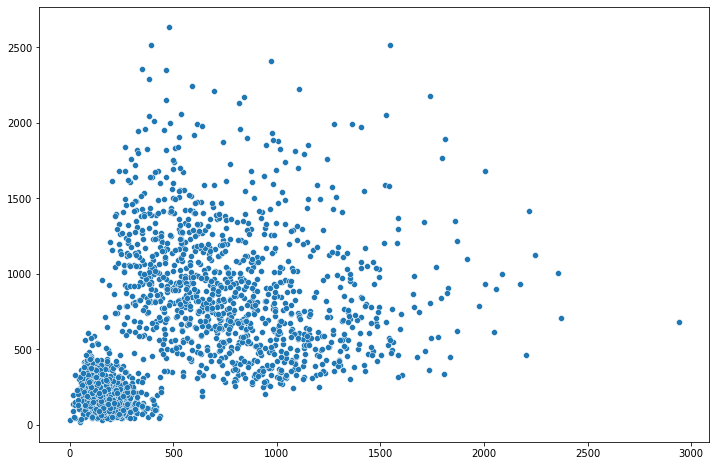

In [64]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=height_list, y=width_list);


In [66]:
print(min(height_list))
min_image_index=np.argmin(height_list)
print("index:",min_image_index)
im=PIL.Image.open(rusty_wheat_list[min_image_index-len(healthy_wheat_list)])
im.show()
imread(rusty_wheat_list[min_image_index-len(healthy_wheat_list)]).shape

1
index: 1422


(1, 30, 3)

In [54]:
print(min(width_list))
min_image_index=np.argmin(width_list)
im=PIL.Image.open(rusty_wheat_list[min_image_index-len(healthy_wheat_list)])
im.show()
imread(rusty_wheat_list[min_image_index-len(healthy_wheat_list)]).shape

18


(52, 18, 3)

In [55]:
treshold_for_imsize=20
print("count of images with height less than 20px:",sum(np.array(height_list)<treshold_for_imsize))
print("count of images with width less than 20px:",sum(np.array(width_list)<treshold_for_imsize))

count of images with height less than 20px: 4
count of images with width less than 20px: 1


In [57]:
min_height_image_indexes=[i for i in range(len(height_list)) if height_list[i] < treshold_for_imsize]
for i in min_height_image_indexes:
  im=PIL.Image.open(rusty_wheat_list[i-len(healthy_wheat_list)])
  im.show()
  print(imread(rusty_wheat_list[i-len(healthy_wheat_list)]).shape)

(18, 138, 3)


(18, 94, 3)


(1, 30, 3)


(18, 196, 3)


In [67]:
#decided to exclude the image with the height of 1px
rusty_wheat_list.pop(min_image_index-len(healthy_wheat_list))
print(len(rusty_wheat_list))

923


In [71]:
height_list.pop(min_image_index)
width_list.pop(min_image_index)

30

In [73]:
np.mean(height_list),np.median(height_list)

(518.6140264835703, 372.0)

In [74]:
np.mean(width_list),np.median(width_list)

(590.3727317312408, 438.0)

In [68]:
seed=53
np.random.seed(seed)

In [69]:
np.random.shuffle(healthy_wheat_list)

print(len(healthy_wheat_list))
healthy_test_list=healthy_wheat_list[:int(len(healthy_wheat_list)/5)]
healthy_validation_list=healthy_wheat_list[int(len(healthy_wheat_list)/5):2*int(len(healthy_wheat_list)/5):]
healthy_train_list=healthy_wheat_list[2*int(len(healthy_wheat_list)/5)::]

print(len(healthy_test_list))
print(len(healthy_validation_list))
print(len(healthy_train_list))

1116
223
223
670


In [70]:
np.random.shuffle(rusty_wheat_list)

print(len(rusty_wheat_list))
rusty_test_list=rusty_wheat_list[:int(len(rusty_wheat_list)/5)]
rusty_validation_list=rusty_wheat_list[int(len(rusty_wheat_list)/5):2*int(len(rusty_wheat_list)/5):]
rusty_train_list=rusty_wheat_list[2*int(len(rusty_wheat_list)/5)::]

print(len(rusty_test_list))
print(len(rusty_validation_list))
print(len(rusty_train_list))

923
184
184
555
